<a href="https://colab.research.google.com/github/Abishek-077/180D-ML-AI-Learning-/blob/main/crmeRateipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LLOADING AND PREPARING THE DATA FOR ANALYSIS

In [24]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

plt.style.use('seaborn')
The first line of the preceding code enables matplotlib to display the
graphical output of the code in the notebook environment. The lines of code
that follow use the import keyword to load various Python modules into our
programming environment. This includes patsy, which is a Python module.
Some of the modules are given aliases for easy referencing, such as the
seaborn module being given the alias sns. Therefore, whenever we refer
to seaborn in subsequent code, we use the alias sns. The patsy module
is imported without an alias. We, therefore, use the full name of the patsy
module in our code where needed.
The plot_corr and train_test_split functions are imported from
the statsmodels.graphics.correlation and sklearn.model_
selection modules respectively. The last statement is used to set the
aesthetic look of the graphs that matplotlib generates to the type displayed
by the seaborn module.

3. Next, load the Boston.CSV file and assign the variable name rawBostonData
to it by running the following code:


In [4]:
rawBostonData = pd.read_csv\
                ('https://raw.githubusercontent.com/'\
                 'PacktWorkshops/The-Data-Science-'\
                 'Workshop/master/Chapter02/'\
                 'Dataset/Boston.csv')

4. Inspect the first five records in the DataFrame:

In [5]:
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


5. Check for missing values (null values) in the DataFrame and then drop them
in order to get a clean dataset Use the pandas method dropna() to find and
remove these missing values:

In [6]:
rawBostonData = rawBostonData.dropna()

6 .Check for duplicate records in the DataFrame and then drop them in order to get
a clean dataset. Use the drop_duplicates() method from pandas:

In [7]:
rawBostonData = rawBostonData.drop_duplicates()

List the column names of the DataFrame so that you can examine the fields in
your dataset, and modify the names, if necessary, to names that are meaningful:

In [8]:
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

8. Rename the DataFrame columns so that they are meaningful. Be mindful to
match the column names exactly as leaving out even white spaces in the name
strings will result in an error. For example, this string, ZN, has a white space
before and after and it is different from ZN. After renaming, print the head of the
new DataFrame as follows:

In [9]:
renamedBostonData = rawBostonData.rename(
    columns={
        'CRIM': 'crimeRatePerCapita',
        'INDUS': 'non-retailLandProptn',
        'CHAS': 'riverDummy',
        'NOX': 'nitrixOxide_pp10m',
        'RM': 'AvgNo.RoomsPerDwelling',
        'AGE': 'ProptnOwnerOccupied',
        'DIS': 'weightedDist',
        'RAD': 'radialHighwaysAccess',
        'TAX': 'propTaxRate_per10K',
        'PTRATIO': 'pupilTeacherRatio',
        'LSTAT': 'pctLowerStatus',
        'MEDV': 'medianValue_Ks'
    }
)

renamedBostonData.head()


,crimeRatePerCapita,ZN,INDUS,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1    ZN                     506 non-null    float64
 2   INDUS                   506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


10. now , calculate basic statistics for the numeric columns in DataFrame

In [12]:
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


11. Divinfing the DataFrames into traning and test sets, as shown in the following code snippet:

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Features and target separation
X = renamedBostonData.drop('crimeRatePerCapita', axis=1)   # Features
y = renamedBostonData[['crimeRatePerCapita']]              # Target as DataFrame

# Train-test split parameters
seed = 10
test_data_size = 0.3  # 30% data for testing

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_data_size, random_state=seed
)

# Concatenating features and target back together for easier exploration
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
# trying to contradicathe the fuction for the fun man


Calculate and plot a correlation matrix for the train_data set:

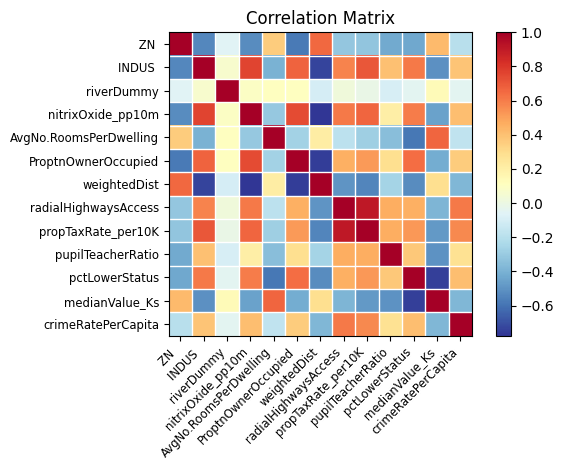

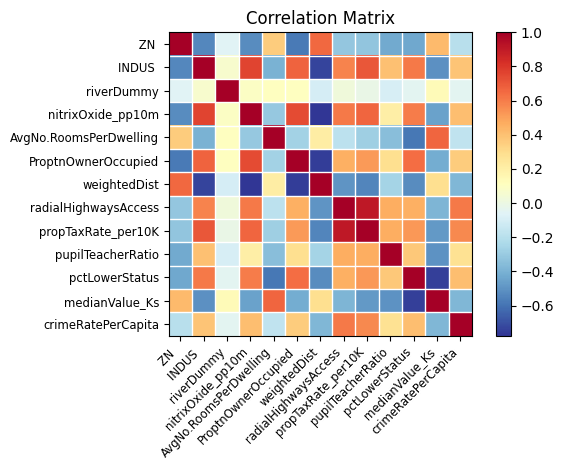

In [22]:
corrMatrix = train_data.corr(method='pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,
          title=None, normcolor=False, cmap='RdYlBu_r')
